<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0315/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from keras import XXX
-> from tensorflow.keras import xx

In [13]:
from tensorflow.keras.datasets import mnist
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


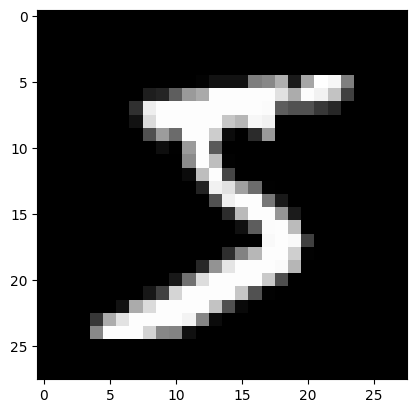

In [15]:
# colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
import pandas as pd
import matplotlib.pyplot as plt

# 灰階圖片(0: 黑色 255: 白色)
pd.DataFrame(x_train[0])
plt.imshow(x_train[0], cmap="gray")

## 激活函式的選擇很重要

1. 輸出層: 看狀況, 分類: a. 互斥(softmax) b. 不互斥(sigmoid)
2. 中間層: relu family(m=1)

In [16]:
# models(地基): Sequential(一層疊一層) Model(自由疊層)
# layers: Dense(全連接層)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(128, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


$ p_i = 正確答案 $

$ q_i = 預測值 $

$ categorical crossentropy(標準ce) = \sum p_i log\frac{1}{q_i}$

如果你最後輸出只有一個的時候你要使用 BinaryCrossentropy

因為你輸出的q -> q: 1這種東西 (1-q): 另外一種東西

$ binary crossentropy = p log \frac {1}{q} + (1-p) log \frac {1}{1-q} $ 

In [17]:
# crossentropy:
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(), metrics=["accuracy"])

In [18]:
# y
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
import numpy as np
# tensorflow建議: x(0~1) x(-1~1)
# tensorflow隨機的weight有配合
# reshape你可以把一個位置替換成-1(讓他自己算)
# x_train.reshape(60000, 784)
x_train_norm = x_train.reshape(-1, 784)
x_test_norm = x_test.reshape(-1, 784)
print(x_train_norm.shape)
print(x_test_norm.shape)

(60000, 784)
(10000, 784)


In [20]:
# epochs: 決定要把整份資料看過幾輪
# 絕對不是越多越好, 越多越過擬和, 反而導致現實資料錯更多
# validation_split: 擬要切出一部分不給模型看, 來驗證這組參數表現得如何
# 一輪: 54000(90%) / 100 -> 540
# 10 epochs: 540 * 10
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
c = [
    ModelCheckpoint("mnist.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=40,
     validation_split=0.1,
     callbacks=c)

Epoch 1/40
540/540 [==============================] - 2s 3ms/step - loss: 4.0645 - accuracy: 0.8632 - val_loss: 0.5790 - val_accuracy: 0.9065
Epoch 2/40
540/540 [==============================] - 2s 3ms/step - loss: 0.5329 - accuracy: 0.9199 - val_loss: 0.4225 - val_accuracy: 0.9330
Epoch 3/40
540/540 [==============================] - 2s 3ms/step - loss: 0.3629 - accuracy: 0.9399 - val_loss: 0.3090 - val_accuracy: 0.9502
Epoch 4/40
540/540 [==============================] - 2s 4ms/step - loss: 0.2808 - accuracy: 0.9511 - val_loss: 0.3327 - val_accuracy: 0.9565
Epoch 5/40
540/540 [==============================] - 2s 3ms/step - loss: 0.2448 - accuracy: 0.9589 - val_loss: 0.2859 - val_accuracy: 0.9558
Epoch 6/40
540/540 [==============================] - 2s 3ms/step - loss: 0.2163 - accuracy: 0.9637 - val_loss: 0.3325 - val_accuracy: 0.9568
Epoch 7/40
540/540 [==============================] - 2s 3ms/step - loss: 0.1951 - accuracy: 0.9678 - val_loss: 0.3871 - val_accuracy: 0.9563
Epoch 

In [22]:
model.predict(x_test_norm)

313/313 [==============================] - 2s 5ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.1980001e-29, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5482769e-35, 1.0000000e+00, 2.8879418e-28, ..., 4.4124708e-25,
        2.4892222e-26, 2.7878263e-35],
       ...,
       [0.0000000e+00, 3.0350382e-18, 0.0000000e+00, ..., 3.5139178e-10,
        3.4022375e-31, 4.2136489e-05],
       [1.6176609e-35, 0.0000000e+00, 0.0000000e+00, ..., 1.0032358e-31,
        1.1787725e-13, 0.0000000e+00],
       [5.3327013e-24, 0.0000000e+00, 1.3656083e-22, ..., 0.0000000e+00,
        1.6344420e-32, 0.0000000e+00]], dtype=float32)